# 1. Data Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier

### 1-1) 데이터 불러오기

In [2]:
PATH="C:/Users/castl/Desktop/2020_job_academy/project/credit"
Ptrain=pd.read_csv(PATH+'/train.csv')
Ptest=pd.read_csv(PATH+'/test.csv')
Psub=pd.read_csv(PATH+'/sample_submission.csv')

### 1-2) 데이터 형태 및 info 확인

In [3]:
# shape으로 형태 알아보기

print('Train data shape:',Ptrain.shape)
print('Test data shape:',Ptest.shape)

Train data shape: (26457, 20)
Test data shape: (10000, 19)


## 훈련 데이터 확인

In [4]:
# basic statics of data
Ptrain.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [5]:
# basic information of data whether null type, data type, columns
Ptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### 데이터 변수 설명


 - index

 - gender: 성별

 - car: 차량 소유 여부

 - reality: 부동산 소유 여부

 - child_num: 자녀 수
 
 - income_total: 연간 소득

 - income_type: 소득 분류

 - edu_type: 교육 수준

 - family_type: 결혼 여부

 - house_type: 생활 방식

 - DAYS_BIRTH: 출생일
			
               데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

 - DAYS_EMPLOYED: 업무 시작일

			   데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
               
               양수 값은 고용되지 않은 상태를 의미함

 - FLAG_MOBIL: 핸드폰 소유 여부

 - work_phone: 업무용 전화 소유 여부

 - phone: 전화 소유 여부

 - email: 이메일 소유 여부

 - occyp_type: 직업 유형													

 - family_size: 가족 규모

 - begin_month: 신용카드 발급 월
			
				데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

 - credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도

				 낮을 수록 높은 신용의 신용카드 사용자를 의미함	

### 1-3) 결측값 확인

In [6]:
# 각 feature마다 null 값확인값확인
Ptrain.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [7]:
# null값의 퍼센트확인
(Ptrain['occyp_type'].isna().sum()/len(Ptrain['occyp_type']))*100

30.884076047926822

In [8]:
Ptrain['occyp_type'].value_counts().sort_index()

Accountants               902
Cleaning staff            403
Cooking staff             457
Core staff               2646
Drivers                  1575
HR staff                   62
High skill tech staff    1040
IT staff                   41
Laborers                 4512
Low-skill Laborers        127
Managers                 2167
Medicine staff            864
Private service staff     243
Realty agents              63
Sales staff              2539
Secretaries                97
Security staff            424
Waiters/barmen staff      124
Name: occyp_type, dtype: int64

### 결측값 분석

- 약 30%의 occyp_type이 null값(결측값)이다.

### 1-4) Feature info 확인 및 feature 분석

In [9]:
# view unique value of each columns to find 

for column in Ptrain.columns.unique():
    print(column,'\n', Ptrain[column].unique())

index 
 [    0     1     2 ... 26454 26455 26456]
gender 
 ['F' 'M']
car 
 ['N' 'Y']
reality 
 ['N' 'Y']
child_num 
 [ 0  1  2  3  4  5 14 19  7]
income_total 
 [ 202500.   247500.   450000.   157500.   270000.   315000.   180000.
  103500.   193500.   135000.   216000.   225000.   405000.   112500.
  121500.   585000.    90900.    99000.    67500.   292500.    90000.
  495000.    54000.   306000.   130500.   144000.   360000.    40500.
   81000.   351000.   184500.    45000.    79650.   153000.   126000.
  382500.   283500.   175500.   297000.   387000.   337500.   256500.
   72000.   540000.   155250.   189000.   139500.   459000.   720000.
  252000.   171000.   427500.    78750.    94500.   562500.   238500.
  630000.    76500.   301500.   229500.   148500.   166500.   463500.
  432000.   117000.   787500.   234000.   108000.   279000.   900000.
  378000.    31500.    29250.   211500.   207000.    49500.    65250.
  265500.   261000.   162000.   310500.   373500.   140850.   123750.

### 데이터 타입별 분석

- 명목형 data: gender, car, reality, income_type, edu_type, family_type, house_type, work_phone, phone, email,occyp_type

- 순서형 data: edu_type

- 수치형 data: child_num, income_total,DAYS_BIRTH, DAYS_EMPLOYED, begin_month

- FLAG_MOBILE의 모든 값은 1임으로 무의미한 feature이다.(drop 예정)

In [10]:
# credit의 분포

Ptrain['credit'].value_counts().sort_index()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [11]:
# gender의 남녀 성비

Ptrain['gender'].value_counts().sort_index()

F    17697
M     8760
Name: gender, dtype: int64

### 명목형 데이터 시각화 및 분석

In [12]:
# feature에 따른 값 확인으로 feature별 분포 확인(명목형 자료)

def bargraph(feature):
    x=Ptrain[feature].unique()
    y=[]
    for i in x:
        y.append(len(Ptrain[Ptrain[feature]==i]))
    plt.figure(figsize=(16,10))
    plt.bar(x,y)
    plt.show()

In [13]:
# feature마다 credit의 분포 확인

def creditbar(feature):
    print(Ptrain.groupby([feature,'credit'])['credit'].count())
    for i in range(len(Ptrain[feature].unique())):
        a=Ptrain[feature]== (Ptrain[feature].unique()[i])
        for j in range(len(Ptrain['credit'].unique())):
            b=Ptrain['credit']==(Ptrain['credit'].unique()[j])
            print('credit:{}에서 {}:{} 인 값의 퍼센테이지 ->  {}%'.format(Ptrain['credit'].unique()[j], feature, Ptrain[feature].unique()[i], len(Ptrain[a & b])*100//len(Ptrain[a])))
    
    sns.barplot(x=feature,y='credit',data=Ptrain)

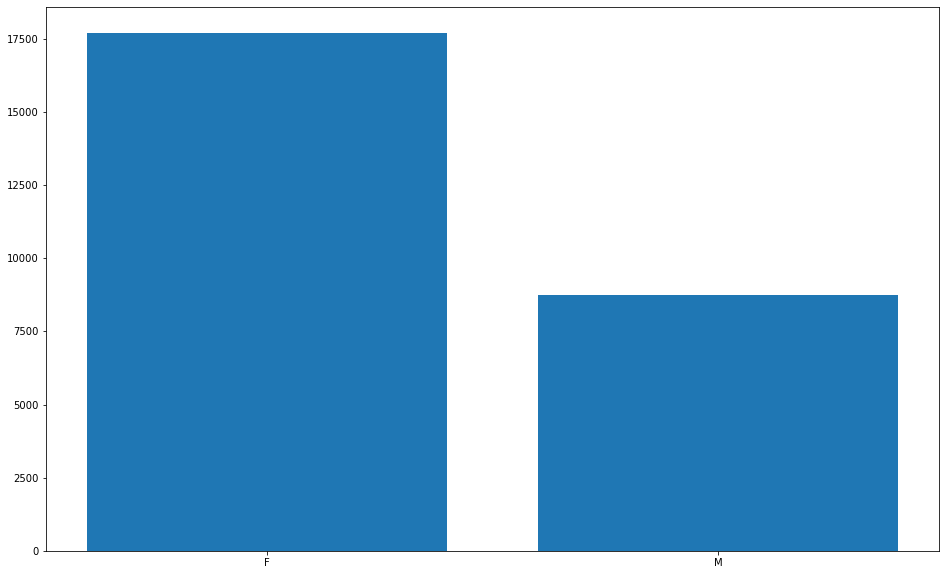

In [14]:
bargraph('gender')

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64
credit:1.0에서 gender:F 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:F 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:F 인 값의 퍼센테이지 ->  12%
credit:1.0에서 gender:M 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:M 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:M 인 값의 퍼센테이지 ->  12%


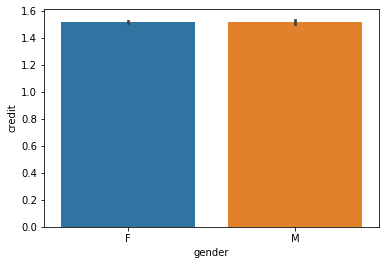

In [15]:
creditbar('gender')

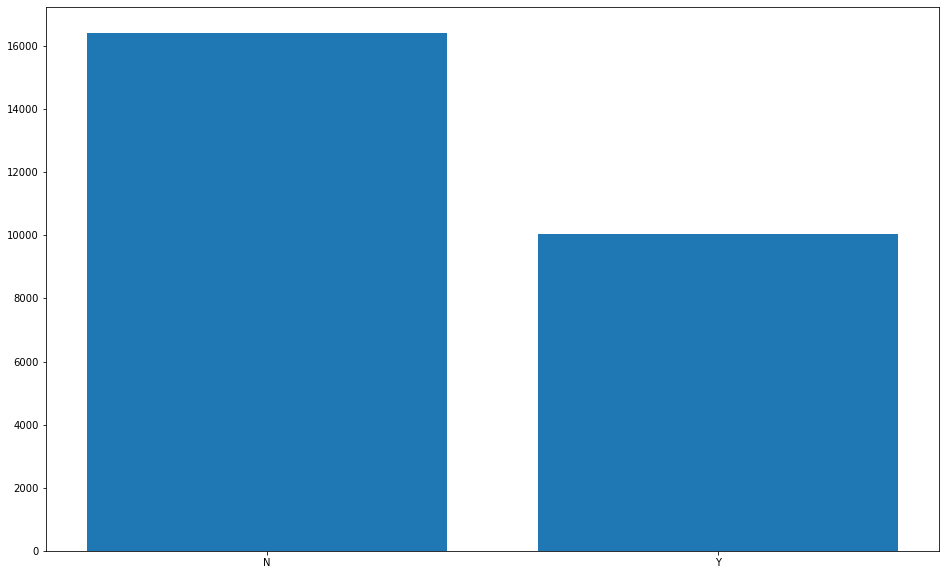

In [16]:
bargraph('car')

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64
credit:1.0에서 car:N 인 값의 퍼센테이지 ->  24%
credit:2.0에서 car:N 인 값의 퍼센테이지 ->  63%
credit:0.0에서 car:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 car:Y 인 값의 퍼센테이지 ->  22%
credit:2.0에서 car:Y 인 값의 퍼센테이지 ->  64%
credit:0.0에서 car:Y 인 값의 퍼센테이지 ->  12%


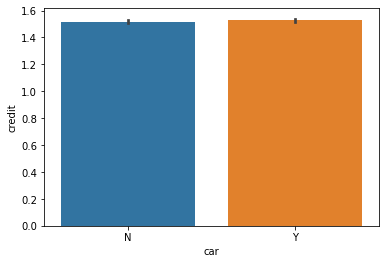

In [17]:
creditbar('car')

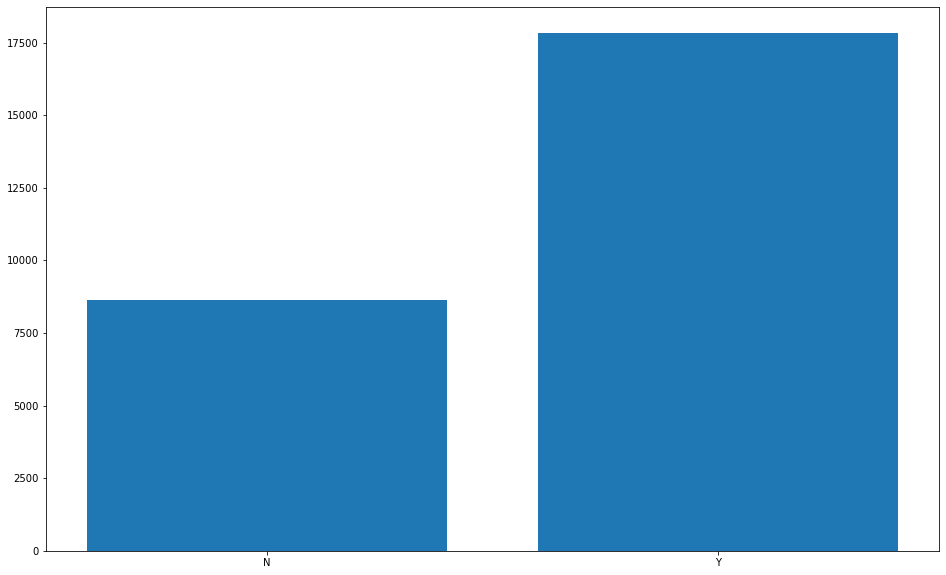

In [18]:
bargraph('reality')

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64
credit:1.0에서 reality:N 인 값의 퍼센테이지 ->  22%
credit:2.0에서 reality:N 인 값의 퍼센테이지 ->  65%
credit:0.0에서 reality:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 reality:Y 인 값의 퍼센테이지 ->  24%
credit:2.0에서 reality:Y 인 값의 퍼센테이지 ->  63%
credit:0.0에서 reality:Y 인 값의 퍼센테이지 ->  12%


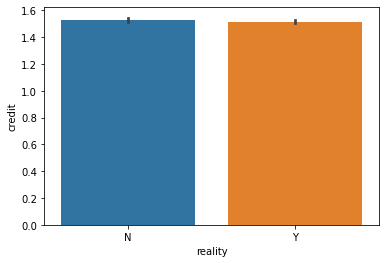

In [19]:
creditbar('reality')

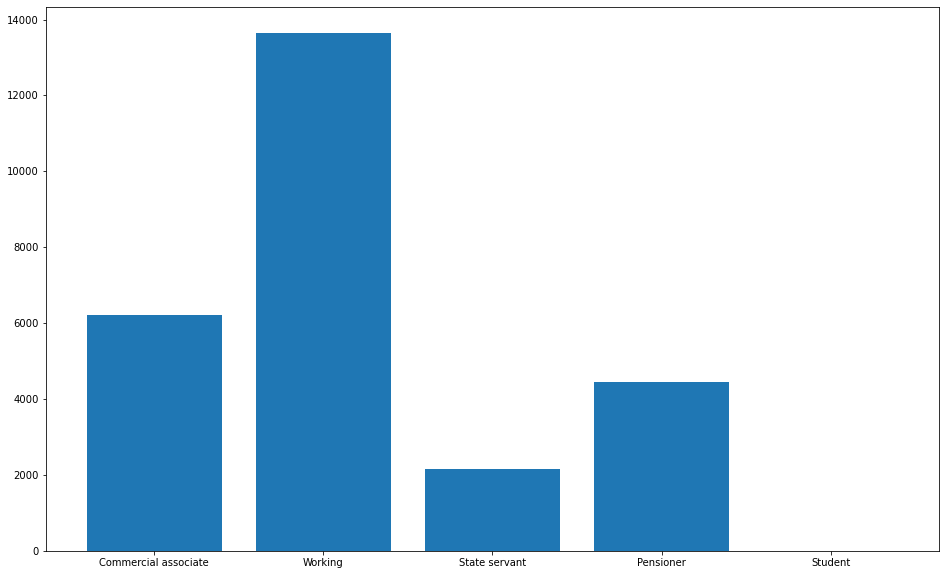

In [20]:
bargraph('income_type')

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64
credit:1.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  21%
credit:2.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  65%
credit:0.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:Working 인 값의 퍼센테이지 ->  24%
credit:2.0에서 income_type:Working 인 값의 퍼센테이지 ->  63%
credit:0.0에서 income_type:Working 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:State servant 인 값의 퍼센테이지 ->  22%
credit:2.0에서 inco

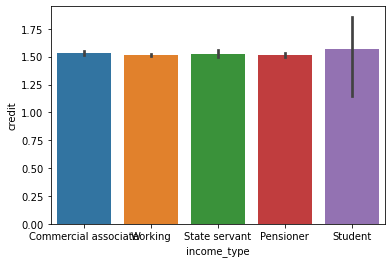

In [21]:
creditbar('income_type')

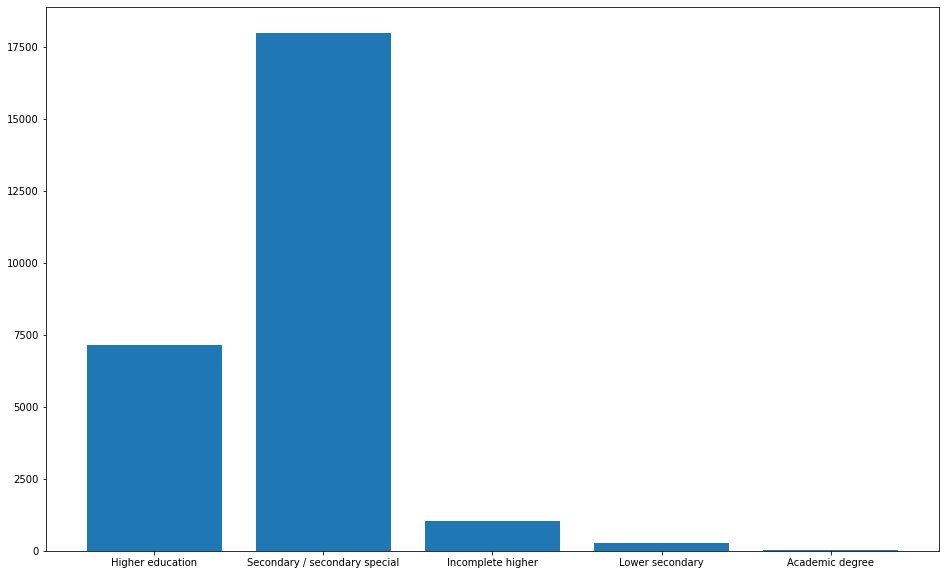

In [22]:
bargraph('edu_type')

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64
credit:1.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  24%
credit:2.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  62%
credit:0.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  12%
credit:1.0에서 edu_type:Secondary / secondary special 인 값의

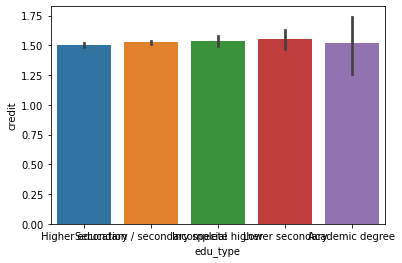

In [23]:
creditbar('edu_type')

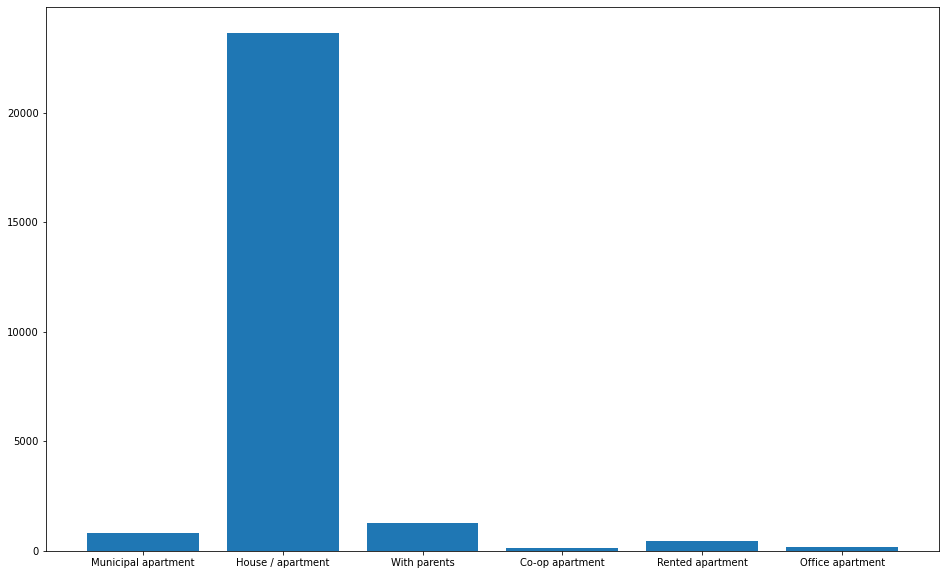

In [24]:
bargraph('house_type')

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
Name: credit, dtype: int64
credit:1.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  19%
credit:2.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  66%
credit:0.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  13%
credit:1.0에서 house_type:House / apartment 인 값의 퍼센테이지 ->  23%
credit:2.0에서 house_type:House

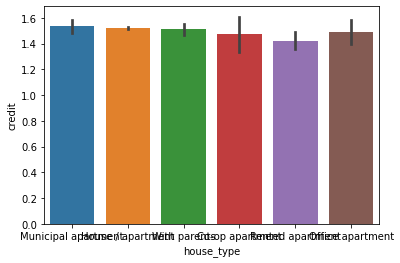

In [25]:
creditbar('house_type')

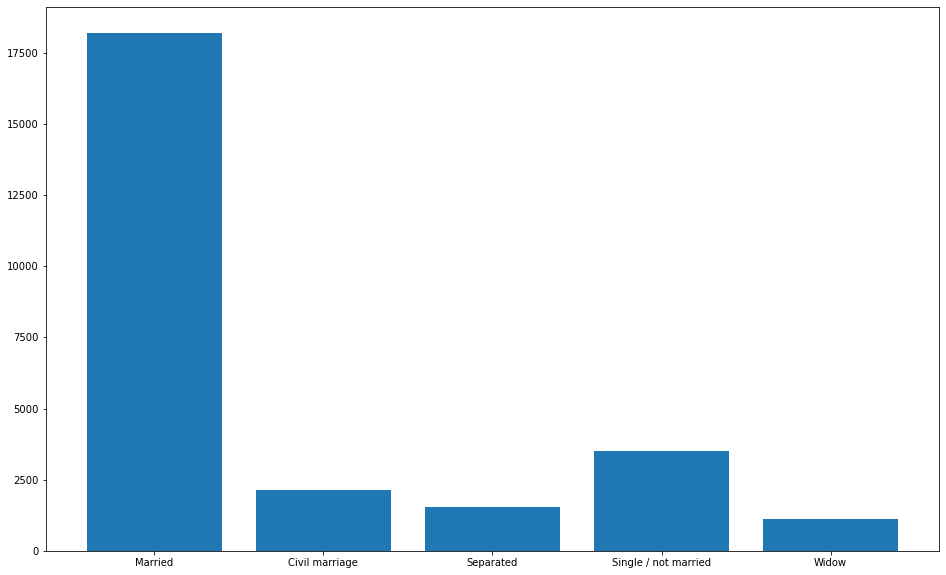

In [26]:
bargraph('family_type')

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64
credit:1.0에서 family_type:Married 인 값의 퍼센테이지 ->  22%
credit:2.0에서 family_type:Married 인 값의 퍼센테이지 ->  65%
credit:0.0에서 family_type:Married 인 값의 퍼센테이지 ->  12%
credit:1.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  25%
credit:2.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  61%
credit:0.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  13%
credit:1.0에서 family_type:Separated 인 값의 퍼

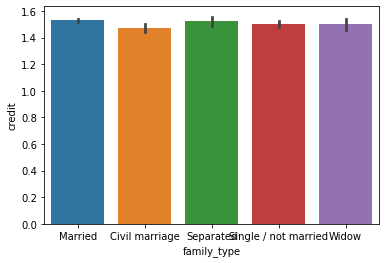

In [27]:
creditbar('family_type')

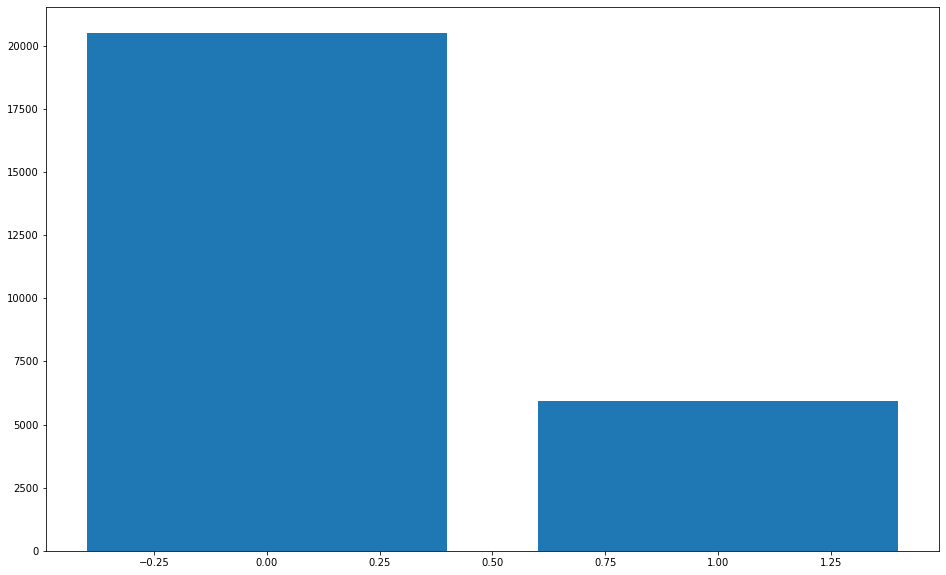

In [28]:
bargraph('work_phone')

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64
credit:1.0에서 work_phone:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:0 인 값의 퍼센테이지 ->  64%
credit:0.0에서 work_phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 work_phone:1 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:1 인 값의 퍼센테이지 ->  63%
credit:0.0에서 work_phone:1 인 값의 퍼센테이지 ->  12%


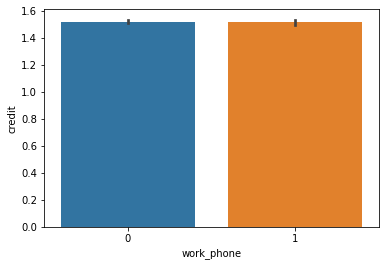

In [29]:
creditbar('work_phone')

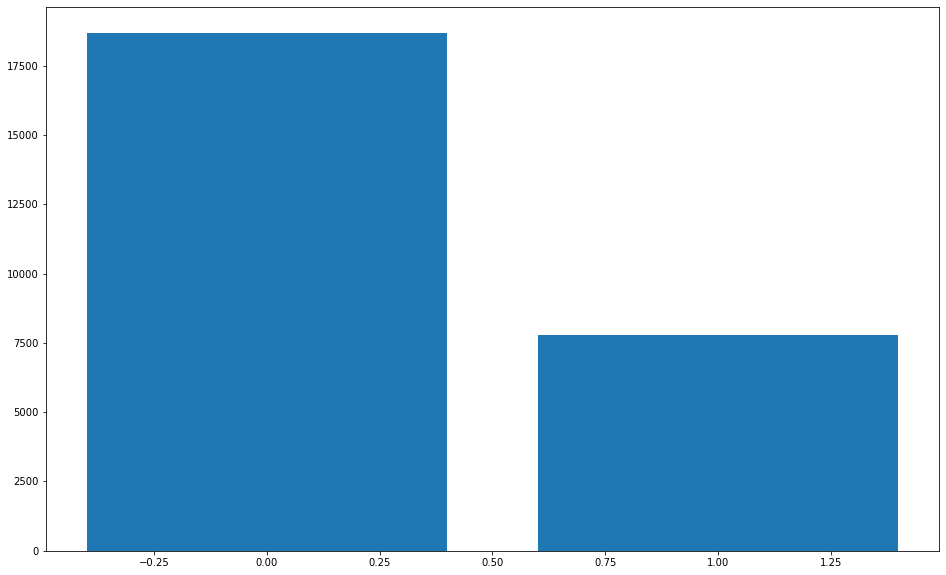

In [30]:
bargraph('phone')

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64
credit:1.0에서 phone:0 인 값의 퍼센테이지 ->  24%
credit:2.0에서 phone:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 phone:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 phone:1 인 값의 퍼센테이지 ->  64%
credit:0.0에서 phone:1 인 값의 퍼센테이지 ->  12%


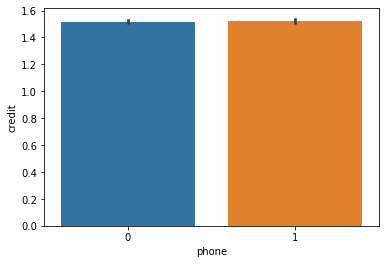

In [31]:
creditbar('phone')

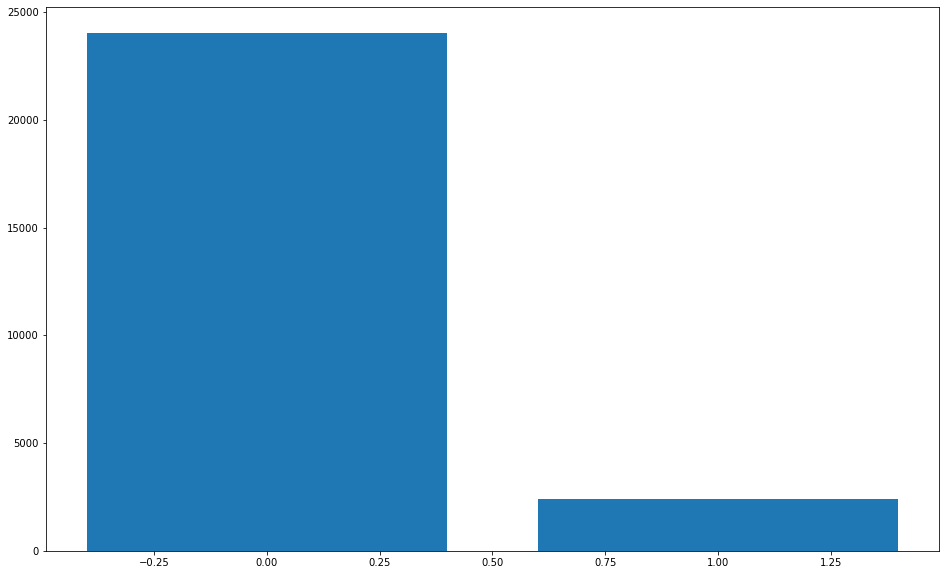

In [32]:
bargraph('email')

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64
credit:1.0에서 email:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 email:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 email:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 email:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 email:1 인 값의 퍼센테이지 ->  66%
credit:0.0에서 email:1 인 값의 퍼센테이지 ->  11%


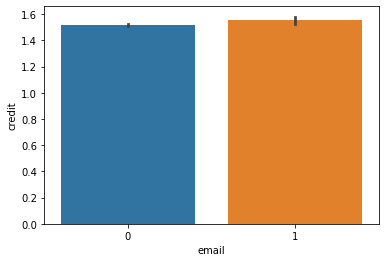

In [33]:
creditbar('email')

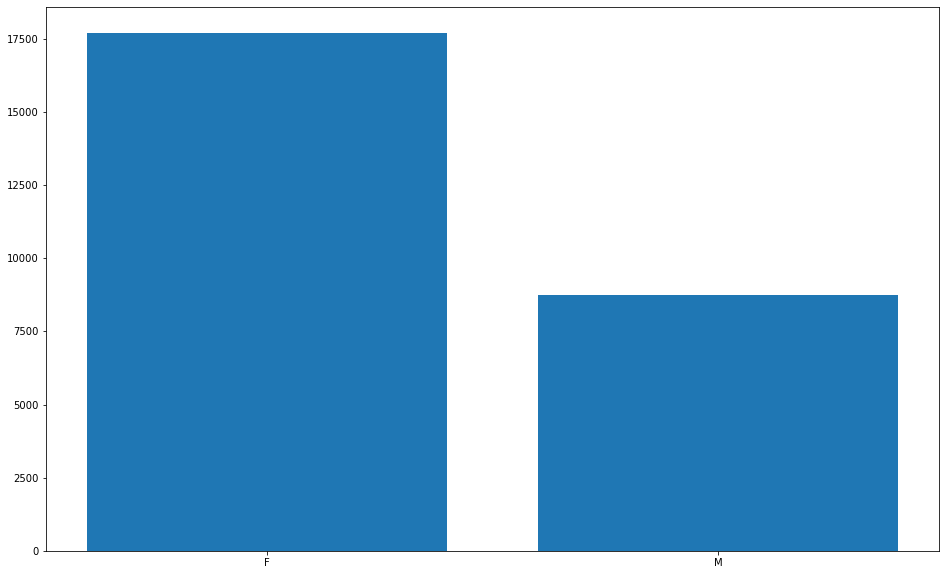

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64
credit:1.0에서 gender:F 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:F 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:F 인 값의 퍼센테이지 ->  12%
credit:1.0에서 gender:M 인 값의 퍼센테이지 ->  23%
credit:2.0에서 gender:M 인 값의 퍼센테이지 ->  64%
credit:0.0에서 gender:M 인 값의 퍼센테이지 ->  12%



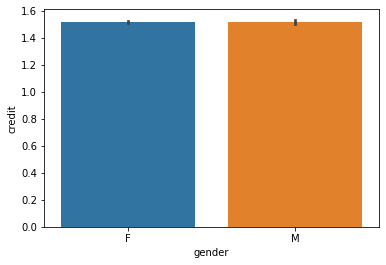

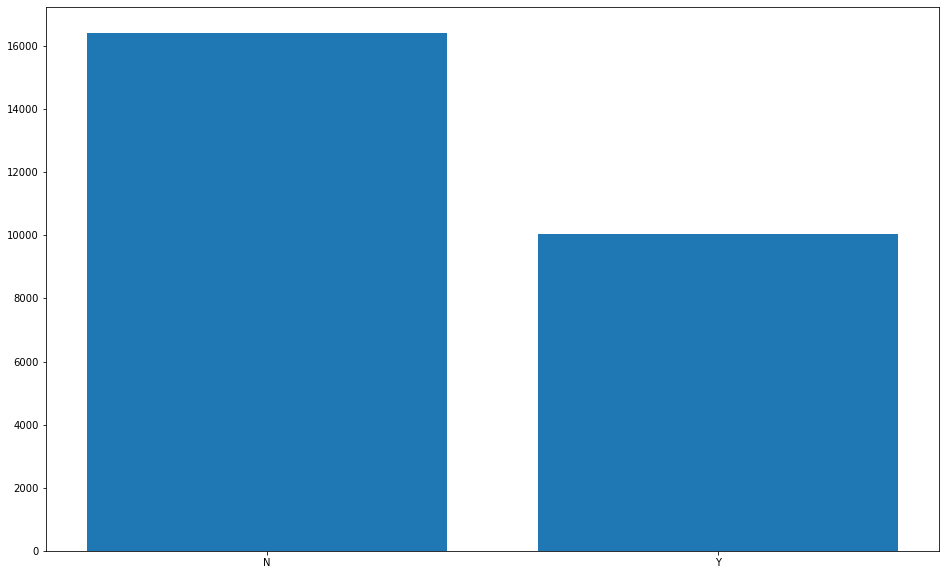

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64
credit:1.0에서 car:N 인 값의 퍼센테이지 ->  24%
credit:2.0에서 car:N 인 값의 퍼센테이지 ->  63%
credit:0.0에서 car:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 car:Y 인 값의 퍼센테이지 ->  22%
credit:2.0에서 car:Y 인 값의 퍼센테이지 ->  64%
credit:0.0에서 car:Y 인 값의 퍼센테이지 ->  12%



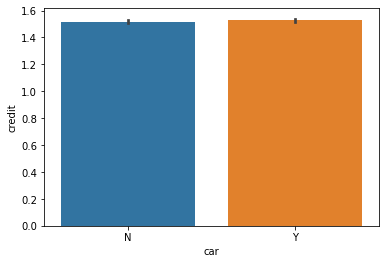

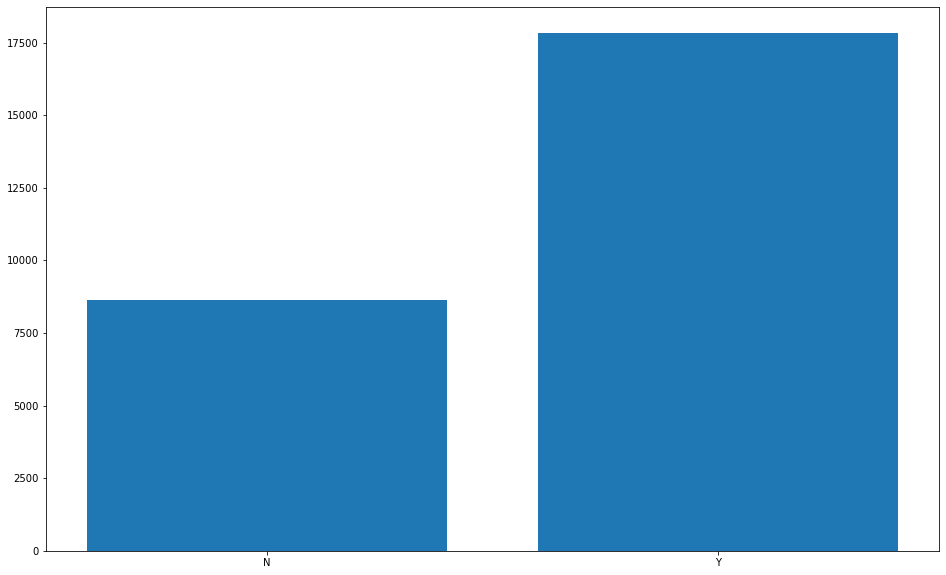

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64
credit:1.0에서 reality:N 인 값의 퍼센테이지 ->  22%
credit:2.0에서 reality:N 인 값의 퍼센테이지 ->  65%
credit:0.0에서 reality:N 인 값의 퍼센테이지 ->  12%
credit:1.0에서 reality:Y 인 값의 퍼센테이지 ->  24%
credit:2.0에서 reality:Y 인 값의 퍼센테이지 ->  63%
credit:0.0에서 reality:Y 인 값의 퍼센테이지 ->  12%



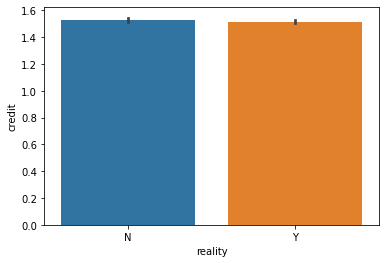

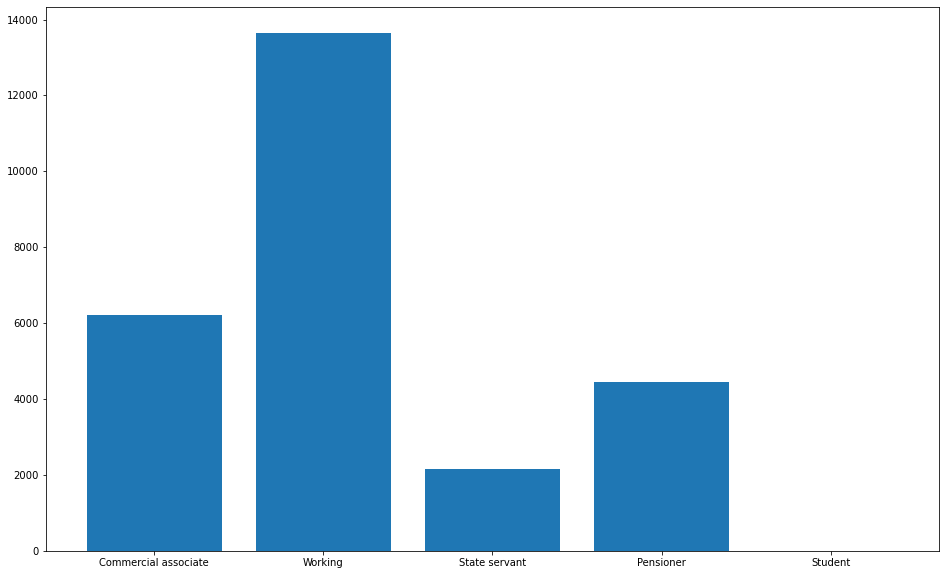

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64
credit:1.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  21%
credit:2.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  65%
credit:0.0에서 income_type:Commercial associate 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:Working 인 값의 퍼센테이지 ->  24%
credit:2.0에서 income_type:Working 인 값의 퍼센테이지 ->  63%
credit:0.0에서 income_type:Working 인 값의 퍼센테이지 ->  12%
credit:1.0에서 income_type:State servant 인 값의 퍼센테이지 ->  22%
credit:2.0에서 inco

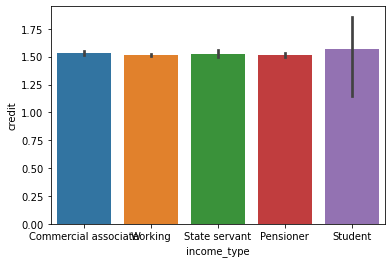

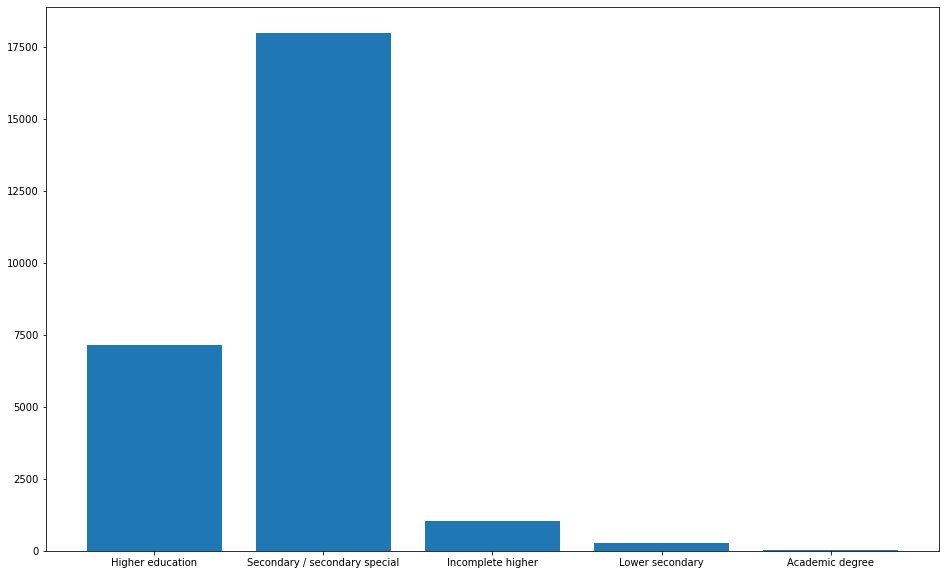

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64
credit:1.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  24%
credit:2.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  62%
credit:0.0에서 edu_type:Higher education 인 값의 퍼센테이지 ->  12%
credit:1.0에서 edu_type:Secondary / secondary special 인 값의

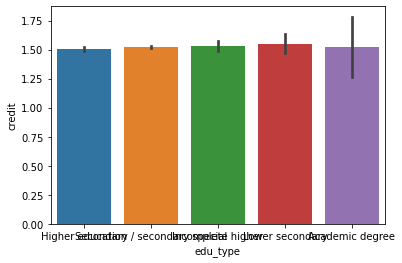

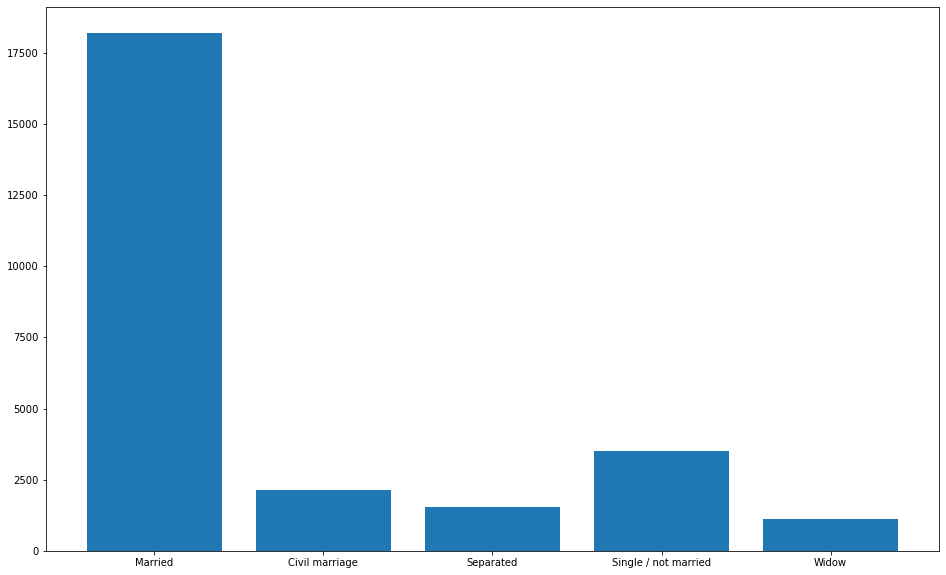

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64
credit:1.0에서 family_type:Married 인 값의 퍼센테이지 ->  22%
credit:2.0에서 family_type:Married 인 값의 퍼센테이지 ->  65%
credit:0.0에서 family_type:Married 인 값의 퍼센테이지 ->  12%
credit:1.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  25%
credit:2.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  61%
credit:0.0에서 family_type:Civil marriage 인 값의 퍼센테이지 ->  13%
credit:1.0에서 family_type:Separated 인 값의 퍼

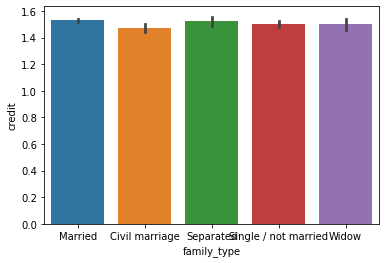

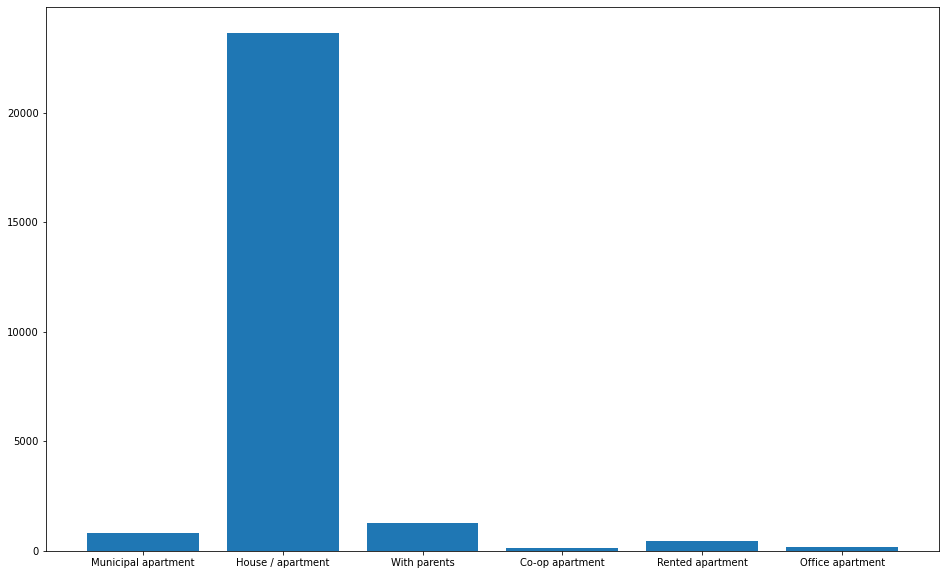

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
Name: credit, dtype: int64
credit:1.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  19%
credit:2.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  66%
credit:0.0에서 house_type:Municipal apartment 인 값의 퍼센테이지 ->  13%
credit:1.0에서 house_type:House / apartment 인 값의 퍼센테이지 ->  23%
credit:2.0에서 house_type:House

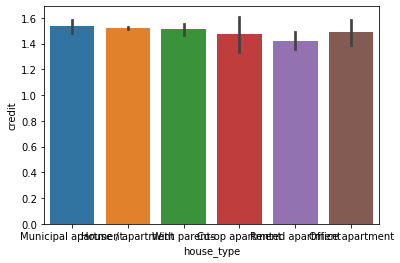

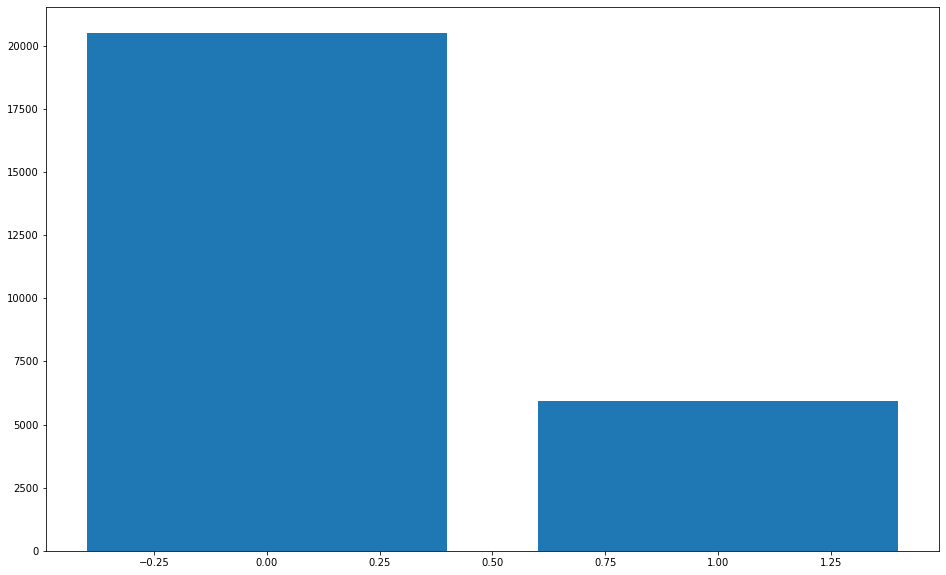

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64
credit:1.0에서 work_phone:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:0 인 값의 퍼센테이지 ->  64%
credit:0.0에서 work_phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 work_phone:1 인 값의 퍼센테이지 ->  23%
credit:2.0에서 work_phone:1 인 값의 퍼센테이지 ->  63%
credit:0.0에서 work_phone:1 인 값의 퍼센테이지 ->  12%



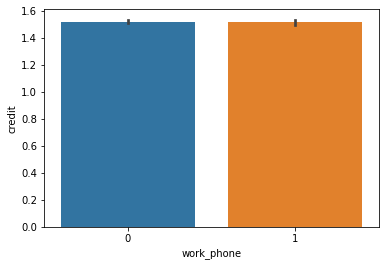

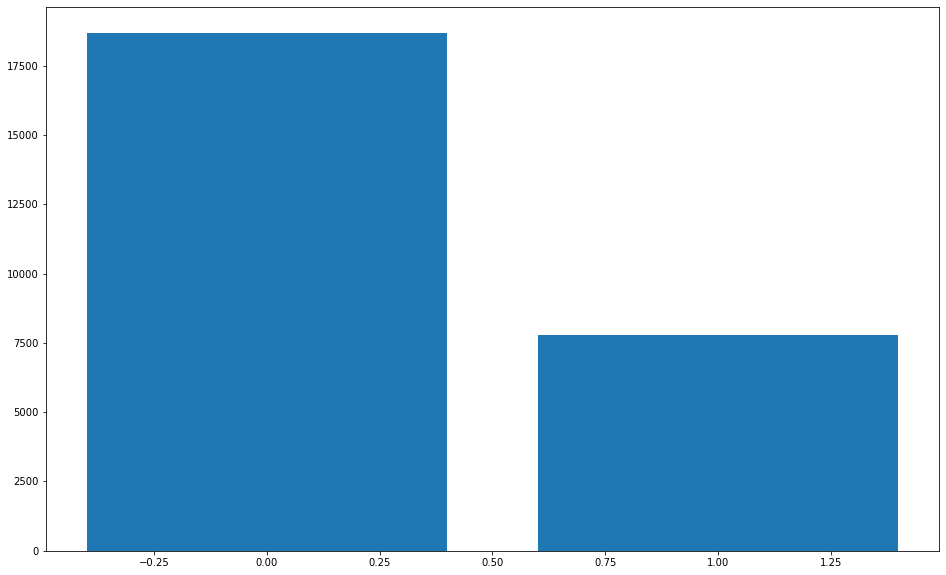

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64
credit:1.0에서 phone:0 인 값의 퍼센테이지 ->  24%
credit:2.0에서 phone:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 phone:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 phone:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 phone:1 인 값의 퍼센테이지 ->  64%
credit:0.0에서 phone:1 인 값의 퍼센테이지 ->  12%



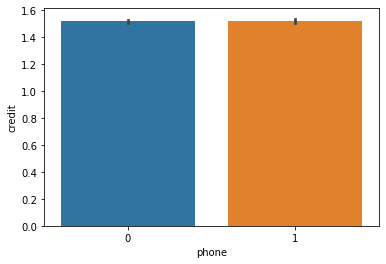

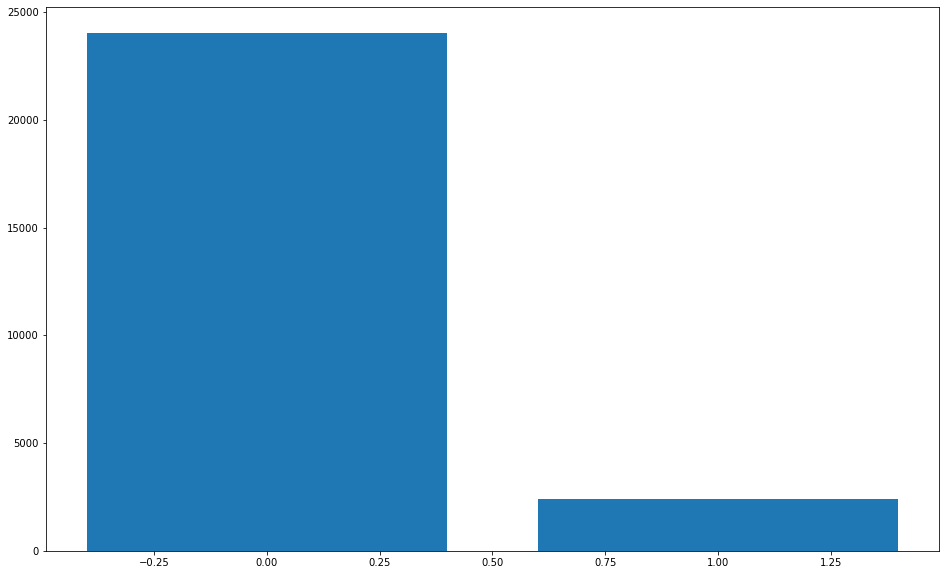

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64
credit:1.0에서 email:0 인 값의 퍼센테이지 ->  23%
credit:2.0에서 email:0 인 값의 퍼센테이지 ->  63%
credit:0.0에서 email:0 인 값의 퍼센테이지 ->  12%
credit:1.0에서 email:1 인 값의 퍼센테이지 ->  22%
credit:2.0에서 email:1 인 값의 퍼센테이지 ->  66%
credit:0.0에서 email:1 인 값의 퍼센테이지 ->  11%



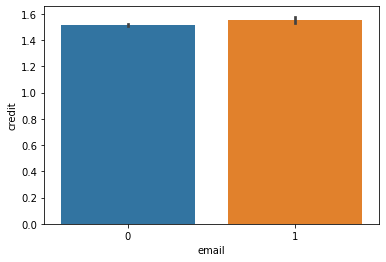

In [34]:
categorical_feature=['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email']

for cf in categorical_feature:
    bargraph(cf)
    creditbar(cf)
    print()
    

### 결과 분석 및 도출

 1) gender
    
    - F가 M보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 남녀 여부에 차이를 보이지 않으므로, 남녀 여부로 인해 credit에 영향을 끼치지 않는것으로 판단함
 
 2) car 
    
    - N이 Y보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 차 보유 여부에 거의 차이를 보이지 않으나 N의 1이 Y의 1보다 약 2%높음. 차 보유 여부로 인해 credit에 영향을 많이 끼치지 않는것으로 판단함
    
 3) reality
    
    - Y가 N보다 약 2배 표본이 많고 각 feature에서 credit 0<1<2 순으로 많다. 분포는 reality 여부에 거의 차이를 보이지 않으나 Y의 1이 N의 1보다 약 2% 높음. reallity로 인해 credit에 영향을 많이 끼치지 않는것으로 판단함
    
 4) income_type
    
    - working이 가장 많으며 student의 표본은 거의 없다.feature에서 credit이 대체적으로 0<1<2순으로 많다. student에서는 credit 0이 거의 없으며, 1이 40%, 2가 60%차지한다. 이로 인해 student일 경우 1 혹은 2일 가능성이 높으나 상대적으로 표본이 적어 부정확하다.
    
 5) edu_type
    
    - Secondary / secondary special의 표본이 가장 많으며 Academical degree는 거의 없다. credit의 분포는 0<1<2순으로 많으며 모든 edu_tyoe에서 비슷한 분포를 보인다.
    
 6) family_type
    
    - married의 표본이 가장 많으며 credit의 분포는 0<1<2순으로 많으며 모든 family_type에서 비슷한 분포를 보인다.
    
 7) house_type
    
    - house/ apartment의 표본이 가장 많다. credit의 분포는 0<1<2순으로 많으며 모든 house_type에서 비슷한 분포를 보인나 rented apartmet는 다른feature 보다 1이 약 7%이상 높고 2가 7% 낮다. rented apartment는 상대적으로 1의 비율이 더 높다.
    
 8) work_phone
    
    - 0의 표본이 약 3.5배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.
     
 9) phone
    
    - 0의 표본이 약 10배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.
     
 10) e-mail
    
    - 0의 표본이 약 10배 가량 많으며  credit의 분포는 0<1<2순으로 많으며 0,1 에서 비슷한 분포를 보인다.

### 수치형 데이터 시각화 및 분석

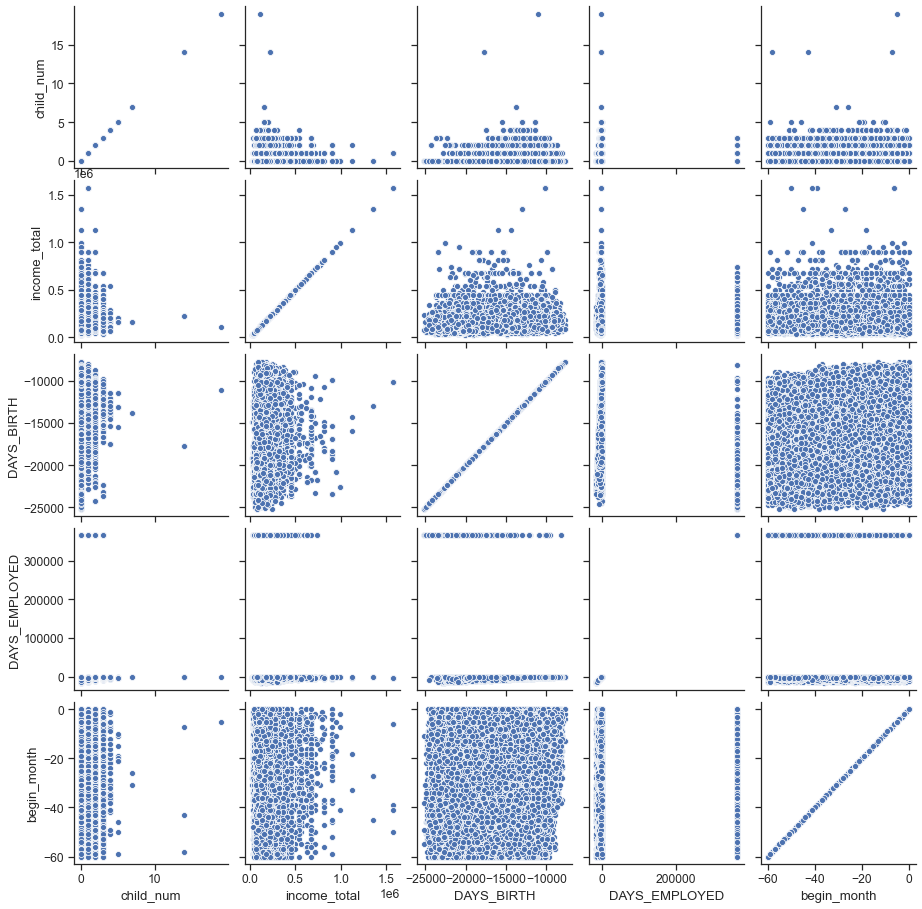

In [35]:
# 수치형 변수에 대한 상관관계 분석

sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
data = Ptrain[[ 'child_num', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
sns.pairplot(data,
             diag_kind=None)
plt.show()

### 결과 분석 및 도출

- 수치형 feature 각각에서 양이나 음의 상관관계를 나타내는 것은 없다.

- child_num이 10명 이상이면 days_employed, income_total이 저조하다.

### 1-5) 이상치 도출

- 수치형 데이터에 대해 boxplot을 사용하여 이상치 도출

In [36]:
num_feature=[ 'child_num', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

def credit_box(feature):
    plt.boxplot(Ptrain[feature])
    plt.show()

child_num


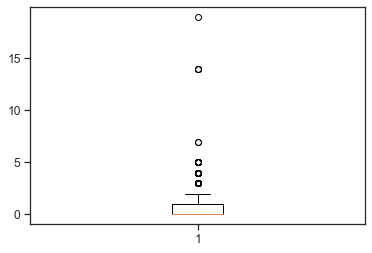

income_total


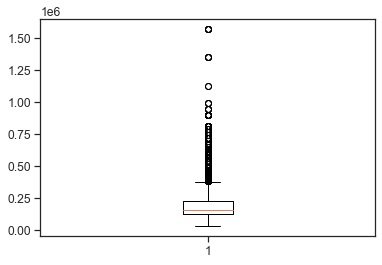

DAYS_BIRTH


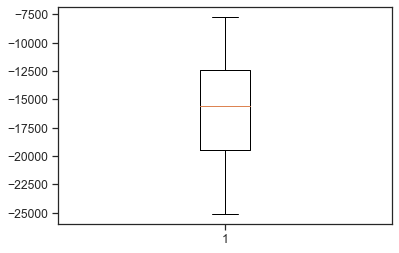

DAYS_EMPLOYED


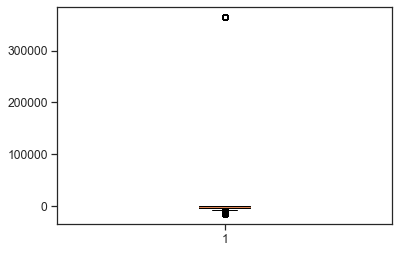

begin_month


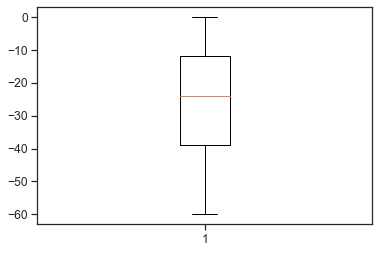

In [37]:
for feature in num_feature:
    print(feature)
    credit_box(feature)

## 테스트 데이터 확인

In [38]:
Ptest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [39]:
# view unique value of each columns to find 
for column in Ptest.columns.unique():
    print(column,'\n', Ptest[column].unique())

index 
 [26457 26458 26459 ... 36454 36455 36456]
gender 
 ['M' 'F']
car 
 ['Y' 'N']
reality 
 ['N' 'Y']
child_num 
 [0 1 2 3 5 4]
income_total 
 [ 112500.   135000.    69372.   225000.   126000.   585000.   141750.
  130500.    90000.   144000.   202500.   180000.   315000.   270000.
  229500.   166500.   157500.   207000.   171000.   108000.    49500.
  238500.   391500.   427500.   139500.   360000.   765000.   189000.
  122400.    72000.   148500.    67500.   261000.   162000.   193500.
  247500.    99000.   288000.    81000.   333000.   450000.   121500.
  292500.   159750.   103500.   495000.    58500.   900000.    29250.
  351000.   310500.   117000.   185400.   382500.    63000.    54000.
  211500.   337500.   140850.   369000.    94500.   607500.    40500.
   76500.    30150.   378000.   256500.   243000.   153000.   115200.
  360450.   265500.   198000.   675000.   720000.    90900.   324000.
   45000.   405000.   612000.    73575.   184500.   306000.   216000.
  297000.    6

# 2. 데이터 가공하기

In [40]:
# 복사본을 만들어 복사본을 target과 feature로 나눈다.
c_train=Ptrain.copy()
c_target=c_train['credit']

print(c_train.shape)
print(c_target.shape)

(26457, 20)
(26457,)


### 2-1) 중복 데이터 확인 및 파생변수 생성

 - 동일인이 신용카드를 2개 이상 발급 받을 경우 중복 데이터 생성.
 - credit_num으로 발급한 신용카드 갯수 저장
 - -1인 경우 이미 중복 데이터이므로 삭제

In [1232]:
# 중복 데이터 확인
# credit_num 변수 생성하여 몇개의 중복데이터가 있는지 저장
# credit_num으로 몇개의 신용카드를 만들었는지 확인 가능

def find_multidata(data):
    data=data.drop(['index'],axis=1)
    how_many=[]
    
    for i in range(len(data)):
        total=1
        for j in range(len(data)):
            if list(data.iloc[i])==list(data.iloc[j]):
                total+=1
        how_many.append(total)
    return how_many


c_train['credit_num']=find_multidata(c_train)
c_train.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,credit_num
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,2
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,2
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,2
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,2


In [1233]:
# csv파일로 변환하여 저장

c_train.to_csv(PATH+'/train_creditnum.csv', index=False, encoding='cp949') 

In [41]:
c_train=pd.read_csv(PATH+'/train_creditnum.csv')

### 2-2) 데이터 범주화 

 - DAYS_BIRTH, DAYS_EMPLOYED, begin_month의 음수값을 양수로 변환
 - DAYS_BIRTH 10년단위로 범주화
 - DAYS_EMPLOYED 년단위로 범주화 및 이상치(30000달 넘는것) 변경
 - begin_month 년단위로 범주화
 - income_total 단위 축소
 - child_num 이상치 변경
 - family_size 이상치 변경
 - occyp_type 결측치 변경

In [42]:
# 음수값을 양수값으로 변환

def toplus(data):
    features=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
    for feature in features:
        data[feature]=-data[feature]
        
toplus(c_train)

### 2-2-1) DAYS_BIRTH

In [43]:
# 일로 된 나이를 년단위로 변환

c_train['DAYS_BIRTH']=c_train['DAYS_BIRTH']//365

In [44]:
# 나이 10년단위로 범주화

def age_categorize(age):
    name=''
    if age<10:
        name='0s'
    elif age<20:
        name='10s'
    elif age<30:
        name='20s'
    elif age<40:
        name='30s'
    elif age<50:
        name='40s'
    elif age<60:
        name='50s'
    elif age<70:
        name='60s'
    else:
        name='over70s'
    
    return name

In [45]:
# 범주화 c_train에 적용

c_train['DAYS_BIRTH']=c_train['DAYS_BIRTH'].apply(lambda x: age_categorize(x))

In [46]:
# 범주화된 데이터 확인

c_train['DAYS_BIRTH'].unique()

array(['30s', '50s', '40s', '20s', '60s'], dtype=object)

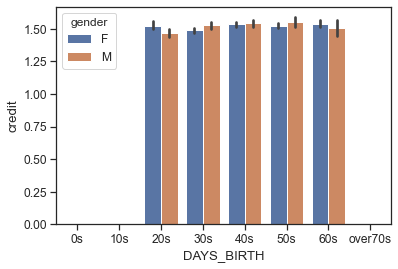

In [47]:
group_names=['0s','10s','20s','30s','40s','50s','60s','over70s']
sns.barplot(x='DAYS_BIRTH',y='credit',hue='gender',data=c_train,order=group_names)

### 2-2-2) DAYS_EMPLOYED

In [48]:
# 일로 된 경력을 년단위로 변환

c_train['DAYS_EMPLOYED']=c_train['DAYS_EMPLOYED']//365

In [49]:
# 음수인 값은 결측치이다(초기 36000이상의 값)

print('결측치 갯수:',len(c_train[c_train['DAYS_EMPLOYED']<0]))
print('결측치 퍼센트:',len(c_train[c_train['DAYS_EMPLOYED']<0])*100/len(c_train))

결측치 갯수: 4438
결측치 퍼센트: 16.774388630608158


In [50]:
# DAYS_EMPLOYED가 음수인 데이터는 연금 수령자(pesioner)과 occyp_type이 nan 이다.

c_train[c_train['DAYS_EMPLOYED']==-1001]
print(c_train.groupby(['DAYS_EMPLOYED','DAYS_BIRTH'])['DAYS_BIRTH'].count())

DAYS_EMPLOYED  DAYS_BIRTH
-1001          20s             15
               30s             26
               40s            126
               50s           2004
               60s           2267
                             ... 
 40            60s             12
 41            50s              3
               60s             14
 42            60s              2
 43            60s              1
Name: DAYS_BIRTH, Length: 149, dtype: int64


In [51]:
a=c_train[c_train['DAYS_EMPLOYED']==-1001]
for i in a.columns.unique():
    print(i,a[i].unique())

index [   14    18    21 ... 26439 26441 26443]
gender ['F' 'M']
car ['N' 'Y']
reality ['Y' 'N']
child_num [0 1 2 3]
income_total [157500.  216000.  202500.  135000.   99000.   54000.  144000.  360000.
 112500.  180000.   79650.   81000.   90000.  153000.  155250.  495000.
 189000.  126000.  121500.   67500.   94500.   76500.  301500.  247500.
 225000.  270000.   31500.   29250.   72000.  108000.   45000.   49500.
  65250.  427500.   40500.  175500.  162000.  211500.  103500.  292500.
 117000.  148500.   58500.  198000.  193500.  315000.   56250.  171000.
  92250.   50850.  130500.  184500.  185400.  450000.   47250.  243000.
  37800.  139500.  252000.  131400.  382500.   56700.   33750.  114750.
  85500.  166500.   33300.  288000.  115290.   38025.  167400.  101250.
 143100.  208350.  220500.   30150.  540000.   36900.  265500.  630000.
 113400.   38250.  742500.  517500.  207000.   63000.  206100.  337500.
 333000.  274500.   67050.  121900.5  31531.5  83250.  279000.  249750.
 28350

In [52]:
c_train['DAYS_EMPLOYED']=c_train['DAYS_EMPLOYED'].replace(-1001,45)

In [53]:
c_train['DAYS_EMPLOYED'].unique()

array([12,  4,  5, 13, 14,  3,  6,  0, 45, 11,  2, 16,  1, 10,  9,  8, 25,
        7, 15, 33, 23, 27, 17, 32, 20, 30, 22, 21, 18, 19, 29, 31, 24, 26,
       28, 36, 41, 34, 35, 40, 39, 37, 42, 43, 38], dtype=int64)

### 2-2-3) begin_month

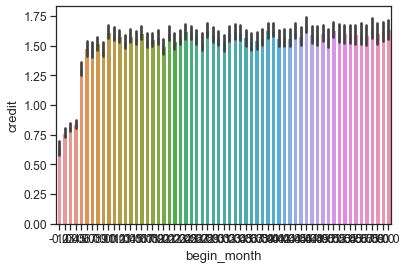

In [54]:
sns.barplot(x='begin_month',y='credit',data=c_train)

In [55]:
c_train['begin_month']=c_train['begin_month'].replace(-0,0)

In [56]:
c_train['begin_month'].unique()

array([ 6.,  5., 22., 37., 26., 18., 41., 53., 38., 40., 51., 60.,  2.,
       14.,  7., 35.,  4., 13., 57., 47., 33., 30., 20.,  8., 39., 21.,
       19., 24., 48., 12., 10., 42., 29.,  3., 23., 25.,  1., 15., 32.,
       59., 54., 34.,  0., 27., 45., 56., 46.,  9., 44., 36., 43., 49.,
       11., 55., 58., 28., 52., 17., 50., 16., 31.])

### 2-2-4) income_total

In [57]:
# income total 단위 변경

c_train['income_total']=round(c_train['income_total']/10000)

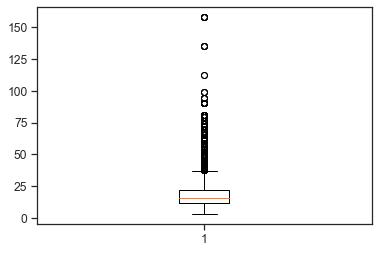

In [58]:
plt.boxplot(c_train['income_total'])
plt.show()

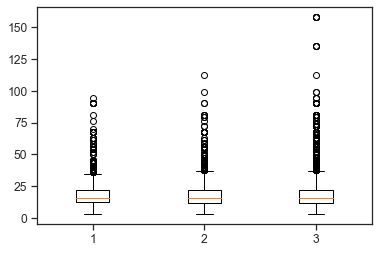

In [59]:
# credit 별 income_total 이상치 확인

c_0=list(c_train[c_train['credit']==0]['income_total'])
c_1=list(c_train[c_train['credit']==1]['income_total'])
c_2=list(c_train[c_train['credit']==2]['income_total'])
d2_income=[c_0,c_1,c_2]
plt.boxplot(d2_income)
plt.show()

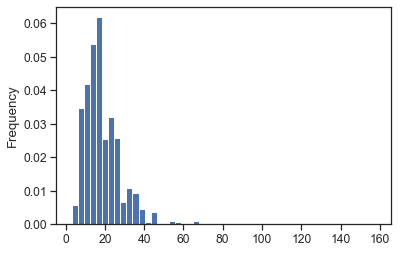

In [60]:
c_train['income_total'].plot(kind='hist',bins=50,density=True)

In [61]:
# 4분위 구하기
def percentile(data):
    min = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    iqr=q3-q1
    max = np.percentile(data,100)  # 최대값
    max_iqr=q3+1.5*iqr
    min_iqr=q1-1.5*iqr
    print('min:{} \nq1:{} \nq2:{} \nq3:{} \nmax:{} \niqr:{} \nmax_iqr:{} \nmin_iqr:{}'.format(min,q1,q2,q3,max,iqr,max_iqr,min_iqr))
        


for credit in d2_income:
    percentile(credit)
    print('-------------------------------------')

min:3.0 
q1:13.0 
q2:16.0 
q3:22.0 
max:94.0 
iqr:9.0 
max_iqr:35.5 
min_iqr:-0.5
-------------------------------------
min:3.0 
q1:12.0 
q2:16.0 
q3:22.0 
max:112.0 
iqr:10.0 
max_iqr:37.0 
min_iqr:-3.0
-------------------------------------
min:3.0 
q1:12.0 
q2:16.0 
q3:22.0 
max:158.0 
iqr:10.0 
max_iqr:37.0 
min_iqr:-3.0
-------------------------------------


In [62]:
# 이상치 

a=c_train['income_total']>41.5
b=c_train['credit']==0
print('credit 0의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


print('--------------------------------------------------------')

a=c_train['income_total']>35.5
b=c_train['credit']==1
print('credit 1의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


print('--------------------------------------------------------')

a=c_train['income_total']>34
b=c_train['credit']==2
print('credit 2의 이상치 갯수:',len(c_train[a&b]))
print('이상치 percentage:',len(c_train[a&b])*100/len(c_train[b]))


credit 0의 이상치 갯수: 94
이상치 percentage: 2.9174425822470513
--------------------------------------------------------
credit 1의 이상치 갯수: 332
이상치 percentage: 5.2975905536939525
--------------------------------------------------------
credit 2의 이상치 갯수: 1146
이상치 percentage: 6.753889674681754


In [63]:
# income_total 소득단위로 범주화(누적 4,11,23,40,60,77,88,96,100%)

def income_categorize(income):
    name=''
    if income<8:
        name='9등급'
    elif income<10:
        name='8등급'
    elif income<13:
        name='7등급'
    elif income<16:
        name='6등급'
    elif income<20:
        name='5등급'
    elif income<24:
        name='4등급'
    elif income<32:
        name='3등급'
    elif income<40:
        name='2등급'
    else:
        name='1등급'
    
    return name

In [64]:
c_train['income_total']=c_train['income_total'].apply(lambda x: income_categorize(x))

### 2-2-5) child_num

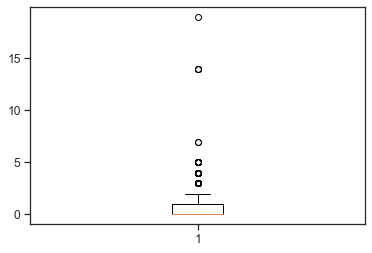

In [65]:
plt.boxplot(c_train['child_num'])
plt.show()

In [66]:
# 3이상 부터 이상치 임을 확인
# 이상치 percentage확인

len(c_train[c_train['child_num']>2])*100/len(c_train)

1.3947159541898175

In [67]:
# 2명 초과면 2로 변경 함(이상치 처리)

for i in c_train['child_num'].unique():
    if i>2:
        c_train['child_num']=c_train['child_num'].replace(i,2)

In [68]:
c_train['child_num'].unique()

array([0, 1, 2], dtype=int64)

### 2-2-6) occyp_type

- 결측치를 Unknown으로 변환

In [69]:
c_train['occyp_type'].fillna('Unknown',inplace=True)

In [70]:
print(c_train['occyp_type'].unique())

['Unknown' 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


### 2-2-7) family_size

- 이상치를 평균값으로 변환

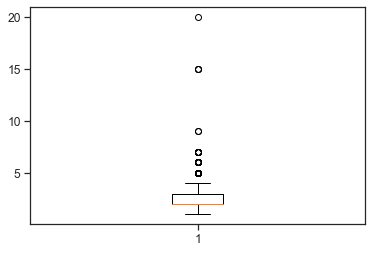

In [71]:
plt.boxplot(c_train['family_size'])
plt.show()

In [72]:
# 4명 초과면 4로 변경 함(이상치 처리)

for i in c_train['family_size'].unique():
    if i>4:
        c_train['family_size']=c_train['family_size'].replace(i,4)

In [73]:
c_train['family_size'].unique()

array([2., 3., 4., 1.])

### 2-3) label-encoding, one-hot-encoding

 - 순서형데이터 혹은 2개 뿐인 binary data -> label-encoding
 - 명목형 data -> one-hot-encoding
 - gender,car,reality,income_total,edu_type -> label-encoding
 - income_type,house_type -> one-hot-encoding

In [74]:
# label-encoding

def encode_features(data):
    features=['gender', 'car', 'reality', 'edu_type','income_total','DAYS_BIRTH',]
    for feature in features:
        le=LabelEncoder()
        le=le.fit(data[feature])
        data[feature]=le.transform(data[feature])
        
    return data

c_train=encode_features(c_train)
c_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,credit_num
0,0,0,0,0,0,3,Commercial associate,1,Married,Municipal apartment,...,12,1,0,0,0,Unknown,2.0,6.0,1.0,2
1,1,0,0,1,1,2,Commercial associate,4,Civil marriage,House / apartment,...,4,1,0,0,1,Laborers,3.0,5.0,1.0,2
2,2,1,1,1,0,0,Working,1,Married,House / apartment,...,12,1,0,1,0,Managers,2.0,22.0,2.0,2
3,3,0,0,1,0,3,Commercial associate,4,Married,House / apartment,...,5,1,0,1,0,Sales staff,2.0,37.0,0.0,2
4,4,0,1,1,0,4,State servant,1,Married,House / apartment,...,5,1,0,0,0,Managers,2.0,26.0,2.0,2


In [75]:
ohe_train=c_train


features=['income_type','house_type','family_type','occyp_type']

for feature in features:
    col_ohe=pd.get_dummies(c_train[feature],prefix=feature)
    c_train=pd.concat((c_train,col_ohe),axis=1).drop(feature,axis=1)

In [76]:
c_train.head()

,index,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,0,0,0,0,0,3,1,1,12,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,1,2,4,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,1,3,12,1,...,0,1,0,0,0,0,0,0,0,0
3,3,0,0,1,0,3,4,2,5,1,...,0,0,0,0,0,1,0,0,0,0
4,4,0,1,1,0,4,1,2,5,1,...,0,1,0,0,0,0,0,0,0,0


In [77]:
c_train.corr()

,index,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
index,1.000000,-0.006261,0.004210,0.006645,0.001570,-0.004446,-0.003183,0.011475,0.004571,NaN,...,-0.006251,0.006321,0.002537,-0.002837,0.001953,0.004911,-0.003408,-0.003201,0.000117,0.006263
gender,-0.006261,1.000000,0.362320,-0.048927,0.082306,-0.231939,0.006351,-0.197551,-0.206396,NaN,...,0.075473,0.092990,-0.115262,-0.052584,-0.022838,-0.135702,-0.038693,0.104643,-0.153575,-0.021233
car,0.004210,0.362320,1.000000,-0.016599,0.105201,-0.232641,-0.105567,-0.151322,-0.174762,NaN,...,-0.018285,0.120726,-0.040357,-0.014106,-0.004672,-0.028604,-0.025560,-0.006830,-0.123378,-0.033169
reality,0.006645,-0.048927,-0.016599,1.000000,-0.004181,-0.033865,0.011535,0.121050,0.091475,NaN,...,-0.004186,0.007529,-0.013732,0.013723,0.009169,-0.014534,-0.000494,-0.006256,0.053292,0.012317
child_num,0.001570,0.082306,0.105201,-0.004181,1.000000,-0.037782,-0.060029,-0.342255,-0.250292,NaN,...,0.000757,0.046414,-0.001036,0.010275,0.009460,0.050010,0.007684,-0.011620,-0.174385,-0.001523
income_total,-0.004446,-0.231939,-0.232641,-0.033865,-0.037782,1.000000,0.226782,0.102312,0.180096,NaN,...,0.045267,-0.241302,0.038801,-0.020394,-0.037612,0.035542,0.017588,0.007315,0.153013,0.013486
edu_type,-0.003183,0.006351,-0.105567,0.011535,-0.060029,0.226782,1.000000,0.159350,0.126104,NaN,...,0.034895,-0.200085,0.060660,0.014260,0.027082,0.034455,-0.031450,0.043665,0.041196,0.022646
DAYS_BIRTH,0.011475,-0.197551,-0.151322,0.121050,-0.342255,0.102312,0.159350,1.000000,0.649617,NaN,...,-0.009980,-0.048941,-0.007612,-0.018899,-0.015176,-0.143477,-0.010907,0.016733,0.402535,-0.036961
DAYS_EMPLOYED,0.004571,-0.206396,-0.174762,0.091475,-0.250292,0.180096,0.126104,0.649617,1.000000,NaN,...,-0.034963,-0.115154,-0.024283,-0.033895,-0.019498,-0.179606,-0.026936,-0.071892,0.628228,-0.041052
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# 의미없는 feature인 FLAG_MOBILE과 occyp_type 제거

c_target=c_train['credit']
c_train=c_train.drop(["FLAG_MOBIL",'credit','index'],axis=1)
print('train set shape:',c_train.shape)
print('target set shape:',c_target.shape)

train set shape: (26457, 49)
target set shape: (26457,)


In [455]:
c_train=c_train.drop(['credit_num'],axis=1)
c_test=c_test.drop(['credit_num'],axis=1)
print('train set shape:',c_train.shape)
print('test set shape:',c_test.shape)

train set shape: (26457, 48)
test set shape: (10000, 48)


# 3. MODELING

### test set 만들기

In [90]:
c_test=Ptest.copy()
c_test.shape

(10000, 19)

In [92]:
c_test['credit_num']=find_multidata(c_test)

In [93]:
c_test.to_csv(PATH+'/test_creditnum.csv', index=False, encoding='cp949') 

In [79]:
c_test=pd.read_csv(PATH+'/test_creditnum.csv')

In [94]:
c_test=c_test[c_test['credit_num']!=-1]

toplus(c_test)
c_test['DAYS_BIRTH']=c_test['DAYS_BIRTH']//365
c_test['DAYS_BIRTH']=c_test['DAYS_BIRTH'].apply(lambda x: age_categorize(x))

c_test['DAYS_EMPLOYED']=c_test['DAYS_EMPLOYED']//365
c_test['DAYS_EMPLOYED']=c_test['DAYS_EMPLOYED'].replace(-1001,45)

        
c_test['begin_month']=c_test['begin_month'].replace(-0.0)

c_test['income_total']=round(c_test['income_total']/10000)
c_test['income_total']=c_test['income_total'].apply(lambda x: income_categorize(x))


for i in c_test['child_num'].unique():
    if i>2:
        c_test['child_num']=c_test['child_num'].replace(i,2)
        
for i in c_test['family_size'].unique():
    if i>4:
        c_test['family_size']=c_test['family_size'].replace(i,4)
        
c_test['occyp_type'].fillna('Unknown',inplace=True)

In [95]:
features=['income_type','house_type','family_type','occyp_type']

c_test=encode_features(c_test)

for feature in features:
    col_ohe=pd.get_dummies(c_test[feature],prefix=feature)
    c_test=pd.concat((c_test,col_ohe),axis=1).drop(feature,axis=1)
    
c_test=c_test.drop(["FLAG_MOBIL","index"],axis=1)

print('test shape:',c_test.shape)

test shape: (10000, 49)


In [96]:
c_test

,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,1,1,0,0,6,4,4,45,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,5,1,3,23,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,8,4,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,6,4,3,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,3,1,2,25,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,3,2,3,14,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,1,1,1,0,3,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,1,0,2,4,3,38,0,0,...,0,0,1,0,0,0,0,0,0,0
9998,0,1,0,0,4,4,2,2,0,1,...,0,0,0,0,0,0,0,0,1,0


### 3-1) SVM

In [463]:
# validation, test set 나누기(데이터 분할)

trainX, testX, trainY, testY = train_test_split(c_train, c_target, test_size=0.2)

In [92]:
# 알맞는 parameter 찾기 (GRID SEARCH)

# 1. 원하는 파라미터를 딕셔너리 형태로 생성
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

# 2. 객체생성
grid_search=GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,return_train_score=True)

# 3.
grid_search.fit(trainX,trainY)

# 4. 모델 평가
print('test set score: {}'.format(grid_search.score(testX,testY)))

# 5. 최적의 파라미터 찾기
print('best parameters: {}'.format(grid_search.best_params_))
print('best score: {}'.format(grid_search.best_score_))

test set score: 0.6439909297052154
best parameters: {'C': 0.001, 'gamma': 0.001}
best score: 0.6406803685329554


In [461]:
def cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(c_train,c_target)):
        X_train, X_test=c_train.iloc[train_index],c_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
        sub+=how.predict_proba(c_test)
    print("MEAN logloss:{}".format(np.mean(outcomes)))
        
    return sub/folds.n_splits

In [170]:
svm=cross_validation(SVC(kernel='rbf',C=10,gamma=0.01, probability=True))

Psub.loc[:,1:]=svm
Psub.to_csv(PATH+'/svm_submission.csv',index=False)

FOLD 0 : logloss:0.8105659171378315
FOLD 1 : logloss:0.8016100885800872
FOLD 2 : logloss:0.8091199656131337
FOLD 3 : logloss:0.8049734368374242
FOLD 4 : logloss:0.8040051731413432
MEAN logloss:0.806054916261964


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-2) GaussianNB

In [456]:
nb=cross_validation(GaussianNB())

Psub.loc[:,1:]=nb
Psub.to_csv(PATH+'/nb_submission.csv',index=False)

FOLD 0 : logloss:2.5202035621631502
FOLD 1 : logloss:2.5861408316889705
FOLD 2 : logloss:2.332703349059883
FOLD 3 : logloss:2.7912060060720747
FOLD 4 : logloss:2.906864901528862
MEAN logloss:2.6274237301025885


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-3) KNN

In [457]:
knn=cross_validation(KNeighborsClassifier(n_neighbors=150))

Psub.loc[:,1:]=knn
Psub.to_csv(PATH+'/knn_submission.csv',index=False)

FOLD 0 : logloss:0.8261306981549917
FOLD 1 : logloss:0.8186717789668339
FOLD 2 : logloss:0.8238920158284986
FOLD 3 : logloss:0.8221716725763101
FOLD 4 : logloss:0.8203386414800641
MEAN logloss:0.8222409614013397


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-4) 로지스틱 회귀

In [458]:
lg=cross_validation(LogisticRegression(multi_class='multinomial',solver='lbfgs',C=20))

Psub.loc[:,1:]=lg
Psub.to_csv(PATH+'/lg_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.865861816991265


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.863094360061954


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8622320572034499


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8611466751441259
FOLD 4 : logloss:0.8628080015151566
MEAN logloss:0.8630285821831902


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-5 )랜덤포레스트

In [462]:
rand_forest=cross_validation(RandomForestClassifier())

Psub.loc[:,1:]=rand_forest
Psub.to_csv(PATH+'/rnd_forest_submission.csv',index=False)

FOLD 0 : logloss:1.0739973222578478
FOLD 1 : logloss:1.1617063265403695
FOLD 2 : logloss:1.1181768771613725
FOLD 3 : logloss:1.030919711966248
FOLD 4 : logloss:1.0930661435729967
MEAN logloss:1.0955732762997668


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3-6) voting ensemble

In [131]:
voting=cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('rf',RandomForestClassifier()),
                ('knn',KNeighborsClassifier(n_neighbors=150))],
    voting='soft'))

Psub.loc[:,1:]=voting
Psub.to_csv(PATH+'/voting_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.7628536536198172


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.7556245071314706


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.761259694523684


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.7557334769324484


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.7592113368132917
MEAN logloss:0.7589365338041423


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  import sys


In [171]:
voting2=cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('svm',SVC(kernel='rbf',C=10,gamma=0.01, probability=True)),
                ('knn',KNeighborsClassifier(n_neighbors=150))],
    voting='soft'))

Psub.loc[:,1:]=voting2
Psub.to_csv(PATH+'/voting2_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.8244639497838262


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.8176063681455271


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.8217447365790566


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.8195519532553998


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.8193273397300697
MEAN logloss:0.8205388694987759


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  import sys


In [460]:
# stacking기법

from sklearn.ensemble import StackingClassifier
import lightgbm

lgb=cross_vlidation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

Psub.loc[:,1:]=lgb
Psub.to_csv(PATH+'/lg_submission.csv',index=False)

FOLD 0 : logloss:0.8007147133710433
FOLD 1 : logloss:0.7886254930054528
FOLD 2 : logloss:0.7922976935618695
FOLD 3 : logloss:0.788857542924167
FOLD 4 : logloss:0.7920333424191762
MEAN logloss:0.7925057570563417


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


# 4. feature 선택 및 중요도 확인

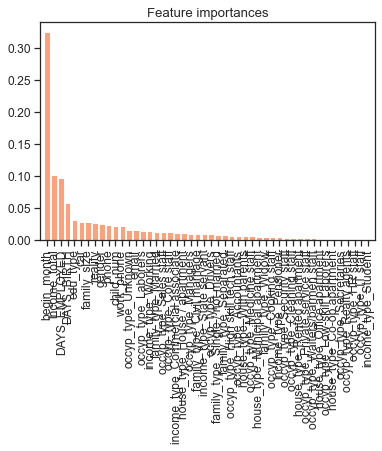

In [468]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(trainX, trainY)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(trainX.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(trainX.shape[1]), c_train.columns[indices], rotation=90)
plt.xlim([-1, trainX.shape[1]])
plt.show()

In [440]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(c_train, c_target)
lasso_feature=list(c_train.columns[np.where(lasso.coef_!=0)[0]])
print('Selected Features:',lasso_feature)

Selected Features: ['reality', 'edu_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'email', 'family_size', 'begin_month', 'credit_num', 'income_type_Commercial associate', 'family_type_Civil marriage', 'family_type_Married', 'occyp_type_Laborers']


In [451]:
ex1_c_train=c_train[lasso_feature]
ex1_c_test=c_test[lasso_feature]
ex1_c_train.head()

,reality,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,email,family_size,begin_month,credit_num,income_type_Commercial associate,family_type_Civil marriage,family_type_Married,occyp_type_Laborers
0,0,1,1,12,0,2.0,6.0,2,1,0,1,0
1,1,4,1,4,1,3.0,5.0,2,1,1,0,1
2,1,1,3,12,0,2.0,22.0,2,0,0,1,0
3,1,4,2,5,0,2.0,37.0,2,1,0,1,0
4,1,1,2,5,0,2.0,26.0,2,0,0,1,0


In [452]:
def ex_cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(ex1_c_train,c_target)):
        
        X_train, X_test=ex1_c_train.iloc[train_index],ex1_c_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
        sub+=how.predict_proba(ex1_c_test)
    
    print("MEAN logloss:{}".format(np.mean(outcomes)))
        
    return sub/folds.n_splits

In [453]:
ex_lgb=ex_cross_validation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

Psub.loc[:,1:]=ex_lgb
Psub.to_csv(PATH+'/ex_lg_submission.csv',index=False)

FOLD 0 : logloss:0.8097267995331693
FOLD 1 : logloss:0.7963254997557742
FOLD 2 : logloss:0.8014528300390641
FOLD 3 : logloss:0.7992275944075283
FOLD 4 : logloss:0.8006154586986951
MEAN logloss:0.8014696364868461


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [472]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
result = pca.fit_transform(c_train)

s_train = pd.DataFrame(result)
s_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-19.968076,2.750596,1.638171,1.857964,-0.328941,0.602935,0.671139,0.437996,0.426262,-0.477101,-1.082555,-0.066844,0.607156,-0.427077,0.244182,0.354944,0.410432,-0.218286,0.052170,-0.049060
1,-22.523404,-4.911058,1.690182,-1.245203,1.014593,0.235765,1.327643,-0.438435,-0.247042,0.282958,0.128062,0.664142,-0.092217,-0.492740,-0.340431,-0.209397,0.647153,0.700729,0.576143,0.319845
2,-4.261864,-0.401401,4.565622,0.719180,-0.864027,-1.198125,-1.038582,0.249546,-0.017194,-0.046226,0.550608,0.007572,-0.069753,-0.106858,0.271904,0.177993,-0.401189,0.239565,-0.229385,0.456589
3,9.066540,-10.123530,0.621885,-1.280839,-0.476183,-0.244270,0.991758,0.226683,0.527084,-0.725477,0.501018,0.052491,-0.048564,-0.469211,0.192513,0.318007,-0.476172,0.175475,-0.282808,-0.420297
4,-1.718183,-7.970130,0.501854,1.809681,-0.968686,-0.662131,0.168189,0.519916,-0.494717,-0.384289,-0.003903,-0.322517,-0.567181,0.460819,0.195973,-0.316033,0.204438,0.044781,-0.832277,0.713907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,-25.266919,-3.337068,0.716278,-0.702257,2.392177,-0.493010,0.844351,-0.550118,0.342938,-0.066065,-0.807853,-0.078098,-0.358445,0.939934,0.516177,-0.749705,-0.026382,0.042712,-0.066307,-0.243097
26453,19.066311,-11.114806,0.310055,1.810524,-0.717756,-0.468331,0.107825,-1.155350,-0.565206,0.300977,-0.018407,-0.340924,0.709420,-0.176107,-0.210507,-0.183331,0.188174,-0.022752,-0.113888,-0.008632
26454,-2.730264,-7.903666,1.616317,-1.162008,0.376678,1.831541,-0.295202,-0.356162,0.128795,0.149624,-0.847675,-0.758205,-0.683881,-0.102039,0.542583,0.380406,0.908358,0.738825,0.467072,-0.281315
26455,29.625931,-19.434785,-0.083129,0.858123,-1.100245,1.922765,-0.435747,-0.404432,-0.854252,0.318123,0.232734,0.892993,0.410032,-0.024066,0.017761,-0.237323,-0.168592,-0.218588,-0.132559,-0.131579


In [476]:
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['credit'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Iris')
plt.show()

NameError: name 'merged' is not defined

<Figure size 1152x648 with 0 Axes>

In [473]:
# PCA 파라미터 구하기

def pca_cross_validation(how):
    
    sub=np.zeros((s_test.shape[0], 3))
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    for n_fold, (train_index, test_index) in enumerate(folds.split(s_train,c_target)):
        X_train, X_test=s_train.iloc[train_index],s_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        how.fit(X_train,Y_train)
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
 
    print('MEAN logloss:{}'.format(np.mean(outcomes)))
    sub+=how.predict_proba(s_test)
        
    return sub/folds.n_splits




In [419]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf

leaky_relu = tf.nn.leaky_relu


model=Sequential()
model.add(Dense(200,input_shape=(c_train.shape[1],),activation=leaky_relu))
model.add(Dropout(0.1))
model.add(Dense(100,activation=leaky_relu))
model.add(Dropout(0.1))
model.add(Dense(50,activation=leaky_relu))
model.add(Dropout(0.1))
model.add(Dense(25,activation=leaky_relu))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [420]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 200)               10000     
_________________________________________________________________
dropout_103 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 100)               20100     
_________________________________________________________________
dropout_104 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_105 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_164 (Dense)            (None, 25)              

In [ ]:
def k_cross_validation(how):
    
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((c_test.shape[0], 3))
    
    
    for n_fold, (train_index, test_index) in enumerate(folds.split(c_train,c_target)):
        X_train, X_test=c_train.iloc[train_index],c_train.iloc[test_index]
        Y_train, Y_test=c_target.iloc[train_index],c_target.iloc[test_index]
        history=how.fit(X_train,Y_train,batch_size=128,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping()])
        
        predictions=how.predict_proba(X_test)
        
        logloss=log_loss(Y_test,predictions)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        outcomes.append(logloss)
        sub+=how.predict_proba(c_test)
    print("MEAN logloss:{}".format(np.mean(outcomes)))
        
    return sub/folds.n_splits

In [425]:
history=model.fit(trainX,trainY,batch_size=128,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping()])

Train on 21165 samples
Epoch 1/100
21165/21165 [==============================] - 1s 27us/sample - loss: 0.7411 - accuracy: 0.7164
Epoch 2/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7430 - accuracy: 0.7150
Epoch 3/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7388 - accuracy: 0.7157
Epoch 4/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7402 - accuracy: 0.7167
Epoch 5/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7384 - accuracy: 0.7174
Epoch 6/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7377 - accuracy: 0.7167
Epoch 7/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7378 - accuracy: 0.7182
Epoch 8/100
21165/21165 [==============================] - 1s 27us/sample - loss: 0.7377 - accuracy: 0.7176
Epoch 9/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7373 - accuracy: 0.7192
Epoch

21165/21165 [==============================] - 1s 26us/sample - loss: 0.7307 - accuracy: 0.7182
Epoch 27/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7283 - accuracy: 0.7195
Epoch 28/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7283 - accuracy: 0.7205
Epoch 29/100
21165/21165 [==============================] - 1s 24us/sample - loss: 0.7256 - accuracy: 0.7203
Epoch 30/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7241 - accuracy: 0.7210
Epoch 31/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7255 - accuracy: 0.7200
Epoch 32/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7238 - accuracy: 0.7210
Epoch 33/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7229 - accuracy: 0.7213
Epoch 34/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7252 - accuracy: 0.7208
Epoch 35/100
21165/21165 [======

21165/21165 [==============================] - 1s 27us/sample - loss: 0.7138 - accuracy: 0.7222
Epoch 52/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7158 - accuracy: 0.7237
Epoch 53/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7146 - accuracy: 0.7228
Epoch 54/100
21165/21165 [==============================] - 1s 24us/sample - loss: 0.7127 - accuracy: 0.7246
Epoch 55/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7141 - accuracy: 0.7245
Epoch 56/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7079 - accuracy: 0.7256
Epoch 57/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7117 - accuracy: 0.7251
Epoch 58/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7077 - accuracy: 0.7247
Epoch 59/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7107 - accuracy: 0.7244
Epoch 60/100
21165/21165 [======

21165/21165 [==============================] - 1s 26us/sample - loss: 0.7022 - accuracy: 0.7247
Epoch 77/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7011 - accuracy: 0.7266
Epoch 78/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.6984 - accuracy: 0.7282
Epoch 79/100
21165/21165 [==============================] - 1s 24us/sample - loss: 0.7007 - accuracy: 0.7290
Epoch 80/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.7001 - accuracy: 0.7278
Epoch 81/100
21165/21165 [==============================] - 1s 24us/sample - loss: 0.6974 - accuracy: 0.7283
Epoch 82/100
21165/21165 [==============================] - 1s 25us/sample - loss: 0.6985 - accuracy: 0.7291
Epoch 83/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7034 - accuracy: 0.7269
Epoch 84/100
21165/21165 [==============================] - 1s 26us/sample - loss: 0.7004 - accuracy: 0.7299
Epoch 85/100
21165/21165 [======

In [474]:
# stacking기법

from sklearn.ensemble import StackingClassifier
import lightgbm

algb=pca_cross_validation(lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))

Psub.loc[:,1:]=algb
Psub.to_csv(PATH+'/alg_submission.csv',index=False)

FOLD 0 : logloss:0.7684344339238428
FOLD 1 : logloss:0.7640350896509711
FOLD 2 : logloss:0.7571068201854413
FOLD 3 : logloss:0.756441416307038
FOLD 4 : logloss:0.7591716004005735
MEAN logloss:0.7610378720935733


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


In [475]:
avoting3=pca_cross_validation(VotingClassifier(
    estimators=[('lr',LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)),
                ('rf',RandomForestClassifier()),
                ('knn',KNeighborsClassifier(n_neighbors=150)),
               ('lgb',lightgbm.LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3))],
    voting='soft'))

Psub.loc[:,1:]=avoting3
Psub.to_csv(PATH+'/avoting3_submission.csv',index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 0 : logloss:0.7583826581799535


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 1 : logloss:0.7550394658989535


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 2 : logloss:0.7572182236944506


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 3 : logloss:0.7509865368299179


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


FOLD 4 : logloss:0.7545074024175618
MEAN logloss:0.7552268574041674


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


# 가설

1. 신용카드 수가 많고 돈을 적게 벌면 신용등급이 낮다.
2. 돈, 집등 물질적인것이 많을 수록 신용등급이 높다.

,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff
0,1,1,0,0,6,4,4,45,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,5,1,3,23,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,8,4,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,6,4,3,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,3,1,2,25,1,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,1,0,5,4,3,5,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,4,3,5,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0,0,1,0,5,1,3,45,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,3,4,3,12,1,1,...,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,5,4,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
